In [63]:
from pickle import FRAME
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [64]:
faces = fetch_lfw_people(min_faces_per_person=60,data_home='data')

In [65]:
faces.images.shape

(1348, 62, 47)

In [66]:
X = faces.data

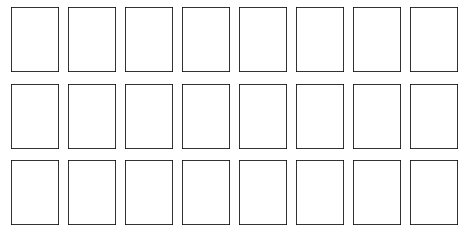

In [67]:
fig, axes = plt.subplots(3,8
                         ,figsize=(8,4)
                         ,subplot_kw = {"xticks":[],"yticks":[]} #不要显示坐标轴
                         )

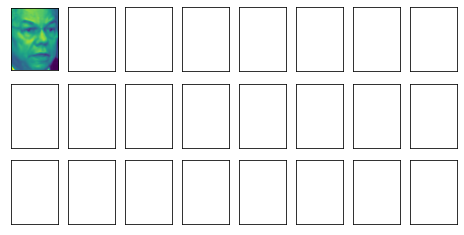

In [68]:
axes[0][0].imshow(faces.images[0,:])
fig

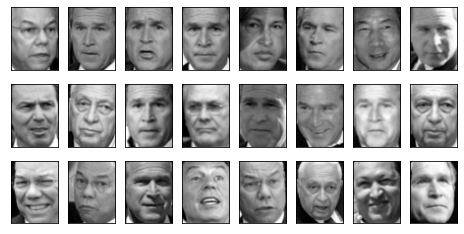

In [69]:
for i,ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:],cmap='gray')
fig  

In [70]:
pca = PCA(150).fit(faces.data)
V = pca.components_
V
V.shape
V[0].reshape(62,47).shape

(62, 47)

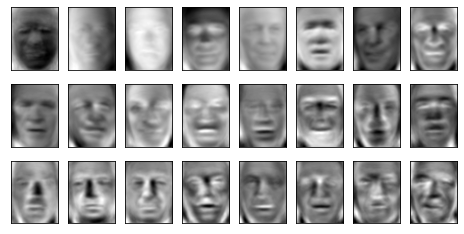

In [71]:
fig, axes = plt.subplots(3,8
                         ,figsize=(8,4)
                         ,subplot_kw = {"xticks":[],"yticks":[]} #不要显示坐标轴
                         )
for i,ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47),cmap='gray')

In [72]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
faces = fetch_lfw_people(min_faces_per_person=60,data_home='data')

In [74]:
X = faces.data
pca = PCA(150)
X_dr = pca.fit_transform(X)
X_dr.shape

(1348, 150)

In [75]:
X = pca.inverse_transform(X_dr)
X.shape

(1348, 2914)

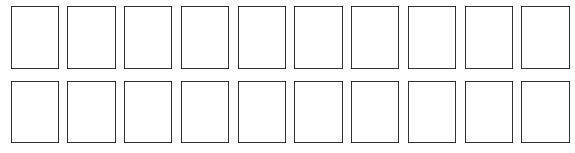

In [80]:
fig,ax = plt.subplots(2,10,
            figsize=(10,2.5),
            subplot_kw={'xticks':[],
            'yticks':[]}
            )

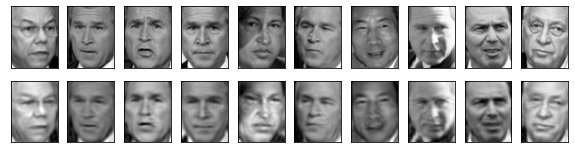

In [82]:
for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap='binary_r')
    ax[1,i].imshow(X[i].reshape(62,47),cmap='binary_r')
fig

In [83]:
# 手写体识别
from sklearn.datasets import load_digits

from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [91]:
digits = load_digits()

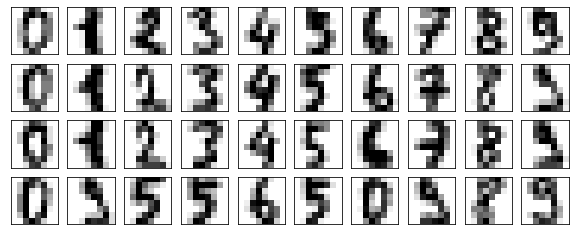

In [92]:
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4)
    ,subplot_kw = {"xticks":[],"yticks":[]}
     )
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary")
plot_digits(digits.data)

(1797, 64)

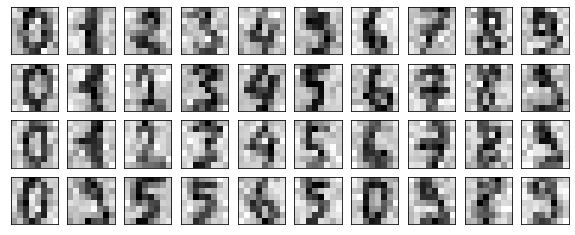

In [94]:
np.random.RandomState(42)
noisy = np.random.normal(digits.data,2)
plot_digits(noisy)


In [95]:

pca = PCA(0.5,svd_solver='full').fit(noisy)
X_dr = pca.transform(noisy)
X_dr.shape

(1797, 6)

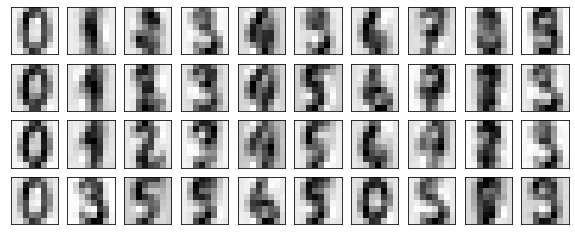

In [96]:
without_noise = pca.inverse_transform(X_dr)
plot_digits(without_noise)